In [ ]:
import numpy as np
import pandas as pd
import re
from urllib.parse import urlparse
import os.path

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
benign = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/1.Benign_list_big_final.csv', header=None, names=['url'])

print(benign)


                                                     url
0      http://1337x.to/torrent/1048648/American-Snipe...
1      http://1337x.to/torrent/1110018/Blackhat-2015-...
2      http://1337x.to/torrent/1122940/Blackhat-2015-...
3      http://1337x.to/torrent/1124395/Fast-and-Furio...
4      http://1337x.to/torrent/1145504/Avengers-Age-o...
...                                                  ...
35373  https://lastpass.com/signup2.php?ac=1&from_uri...
35374  https://lastpass.com/signup2.php?ac=1&from_uri...
35375  https://lastpass.com/signup2.php?ac=1&from_uri...
35376  https://lastpass.com/signup2.php?ac=1&from_uri...
35377  https://asana.com/guide/videos/%22//fast.wisti...

[35378 rows x 1 columns]


In [ ]:
benign['type'] = 'legitimate'

In [ ]:
benign.head()

,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,legitimate
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,legitimate
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,legitimate
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,legitimate
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,legitimate


In [ ]:
benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     35378 non-null  object
 1   type    35378 non-null  object
dtypes: object(2)
memory usage: 552.9+ KB


In [ ]:
print("Dataset shape:", benign.shape)

Dataset shape: (35378, 2)


In [ ]:
print(benign)

                                                     url        type
0      http://1337x.to/torrent/1048648/American-Snipe...  legitimate
1      http://1337x.to/torrent/1110018/Blackhat-2015-...  legitimate
2      http://1337x.to/torrent/1122940/Blackhat-2015-...  legitimate
3      http://1337x.to/torrent/1124395/Fast-and-Furio...  legitimate
4      http://1337x.to/torrent/1145504/Avengers-Age-o...  legitimate
...                                                  ...         ...
35373  https://lastpass.com/signup2.php?ac=1&from_uri...  legitimate
35374  https://lastpass.com/signup2.php?ac=1&from_uri...  legitimate
35375  https://lastpass.com/signup2.php?ac=1&from_uri...  legitimate
35376  https://lastpass.com/signup2.php?ac=1&from_uri...  legitimate
35377  https://asana.com/guide/videos/%22//fast.wisti...  legitimate

[35378 rows x 2 columns]


In [ ]:
data2 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/chongluadao_data.csv')

print(data2)

               udate_time                                                url  \
0     2022-12-27 15:00:04                                https://cic.org.vn/   
1     2022-10-15 14:41:33                              https://vneid.gov.vn/   
2     2022-10-15 14:41:19                       https://dancuquocgia.gov.vn/   
3     2022-10-11 03:42:51                                 https://dx.gov.vn/   
4     2022-04-19 13:27:01                        https://blockchainunion.vn/   
...                   ...                                                ...   
1742  2021-09-25 09:36:06                                   http://zoho.com/   
1743  2021-09-25 09:36:06                                    http://1.1.1.1/   
1744  2021-07-14 12:50:18                           https://corona.kompa.ai/   
1745  2021-07-14 12:50:05                     https://vnhacker.blogspot.com/   
1746  2021-07-14 12:49:55  https://chrome.google.com/webstore/detail/chon...   

     trang_thai       muc_do     type  

In [ ]:
data2.head()

,udate_time,url,trang_thai,muc_do,type
0,2022-12-27 15:00:04,https://cic.org.vn/,Online,Tin cậy cao,An toàn
1,2022-10-15 14:41:33,https://vneid.gov.vn/,Online,Tin cậy cao,An toàn
2,2022-10-15 14:41:19,https://dancuquocgia.gov.vn/,Online,Tin cậy cao,An toàn
3,2022-10-11 03:42:51,https://dx.gov.vn/,Online,Tin cậy cao,An toàn
4,2022-04-19 13:27:01,https://blockchainunion.vn/,Online,Tin cậy cao,An toàn


In [ ]:
data2 = data2[['url']]

In [ ]:
data2['type'] = 'legitimate'
print(data2)

                                                    url        type
0                                   https://cic.org.vn/  legitimate
1                                 https://vneid.gov.vn/  legitimate
2                          https://dancuquocgia.gov.vn/  legitimate
3                                    https://dx.gov.vn/  legitimate
4                           https://blockchainunion.vn/  legitimate
...                                                 ...         ...
1742                                   http://zoho.com/  legitimate
1743                                    http://1.1.1.1/  legitimate
1744                           https://corona.kompa.ai/  legitimate
1745                     https://vnhacker.blogspot.com/  legitimate
1746  https://chrome.google.com/webstore/detail/chon...  legitimate

[1747 rows x 2 columns]


In [ ]:
urldata = pd.concat([benign, data2]).reset_index(drop=True)
print(urldata)

                                                     url        type
0      http://1337x.to/torrent/1048648/American-Snipe...  legitimate
1      http://1337x.to/torrent/1110018/Blackhat-2015-...  legitimate
2      http://1337x.to/torrent/1122940/Blackhat-2015-...  legitimate
3      http://1337x.to/torrent/1124395/Fast-and-Furio...  legitimate
4      http://1337x.to/torrent/1145504/Avengers-Age-o...  legitimate
...                                                  ...         ...
37120                                   http://zoho.com/  legitimate
37121                                    http://1.1.1.1/  legitimate
37122                           https://corona.kompa.ai/  legitimate
37123                     https://vnhacker.blogspot.com/  legitimate
37124  https://chrome.google.com/webstore/detail/chon...  legitimate

[37125 rows x 2 columns]


In [ ]:
urldata["type"].value_counts()

,count
type,
legitimate,37125


In [ ]:
data1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/blacklist.csv')

data1.head()

,url,domain,online,ip,tags
0,vaytiensieutoc.vietcombank247.com.vn,vaytiensieutoc.vietcombank247.com.vn,False,NaN,phishing
1,vaytindung.vietcombank247.com.vn,vaytindung.vietcombank247.com.vn,False,NaN,phishing
2,hotrovay.vietcombank247.com.vn,hotrovay.vietcombank247.com.vn,False,NaN,phishing
3,dangkyonline.vietcombank247.com.vn,dangkyonline.vietcombank247.com.vn,False,NaN,phishing
4,hanoi7.vietcombank247.com.vn,hanoi7.vietcombank247.com.vn,False,NaN,phishing


In [ ]:
data1.tail()

,url,domain,online,ip,tags
122350,https://chuyendoitienquote-nhantien24h.weebly.com,chuyendoitienquote-nhantien24h.weebly.com,True,199.34.228.53,phishing
122351,http://df6daef5.nystreamsly.com.cn/fengtian/?l...,df6daef5.nystreamsly.com.cn,True,NaN,phishing
122352,https://discrods.gift,discrods.gift,True,13.248.169.48,phishing
122353,https://www.ttcgroup.pro,www.ttcgroup.pro,True,NaN,phishing
122354,https://www.sccbqq.top,www.sccbqq.top,True,NaN,phishing


In [ ]:
data1 = data1[['url']]


In [ ]:
data1['type'] = 'phishing'
print(data1)

                                                      url      type
0                    vaytiensieutoc.vietcombank247.com.vn  phishing
1                        vaytindung.vietcombank247.com.vn  phishing
2                          hotrovay.vietcombank247.com.vn  phishing
3                      dangkyonline.vietcombank247.com.vn  phishing
4                            hanoi7.vietcombank247.com.vn  phishing
...                                                   ...       ...
122350  https://chuyendoitienquote-nhantien24h.weebly.com  phishing
122351  http://df6daef5.nystreamsly.com.cn/fengtian/?l...  phishing
122352                              https://discrods.gift  phishing
122353                           https://www.ttcgroup.pro  phishing
122354                             https://www.sccbqq.top  phishing

[122355 rows x 2 columns]


In [ ]:
data1.isnull().sum()

,0
url,0
type,0


In [ ]:
phishing = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/2.online-valid.csv')

phishing.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,6557033,http://u1047531.cp.regruhosting.ru/acces-inges...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T22:01:43+00:00,yes,2020-05-09T22:03:07+00:00,yes,Other
1,6557032,http://hoysalacreations.com/wp-content/plugins...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T22:01:37+00:00,yes,2020-05-09T22:03:07+00:00,yes,Other
2,6557011,http://www.accsystemprblemhelp.site/checkpoint...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:54:31+00:00,yes,2020-05-09T21:55:38+00:00,yes,Facebook
3,6557010,http://www.accsystemprblemhelp.site/login_atte...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:53:48+00:00,yes,2020-05-09T21:54:34+00:00,yes,Facebook
4,6557009,https://firebasestorage.googleapis.com/v0/b/so...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:49:27+00:00,yes,2020-05-09T21:51:24+00:00,yes,Microsoft


In [ ]:
phishing = phishing[['url']]


In [ ]:
phishing['type'] = 'phishing'
print(phishing)

                                                     url      type
0      http://u1047531.cp.regruhosting.ru/acces-inges...  phishing
1      http://hoysalacreations.com/wp-content/plugins...  phishing
2      http://www.accsystemprblemhelp.site/checkpoint...  phishing
3      http://www.accsystemprblemhelp.site/login_atte...  phishing
4      https://firebasestorage.googleapis.com/v0/b/so...  phishing
...                                                  ...       ...
14853                http://bancoestado700.blogspot.com/  phishing
14854       http://www.habbocreditosparati.blogspot.com/  phishing
14855  http://creditiperhabbogratissicuro100.blogspot...  phishing
14856  http://mundovirtualhabbo.blogspot.com/2009_01_...  phishing
14857  http://aijcs.blogspot.com/2005/03/colourful-li...  phishing

[14858 rows x 2 columns]


In [ ]:
urldata1 = pd.concat([phishing, data1]).reset_index(drop=True)
print(urldata1)

                                                      url      type
0       http://u1047531.cp.regruhosting.ru/acces-inges...  phishing
1       http://hoysalacreations.com/wp-content/plugins...  phishing
2       http://www.accsystemprblemhelp.site/checkpoint...  phishing
3       http://www.accsystemprblemhelp.site/login_atte...  phishing
4       https://firebasestorage.googleapis.com/v0/b/so...  phishing
...                                                   ...       ...
137208  https://chuyendoitienquote-nhantien24h.weebly.com  phishing
137209  http://df6daef5.nystreamsly.com.cn/fengtian/?l...  phishing
137210                              https://discrods.gift  phishing
137211                           https://www.ttcgroup.pro  phishing
137212                             https://www.sccbqq.top  phishing

[137213 rows x 2 columns]


In [ ]:
urldata1.isnull().sum()

,0
url,0
type,0


In [ ]:
vn_data = pd.concat([urldata, urldata1]).reset_index(drop=True)
print(vn_data)

                                                      url        type
0       http://1337x.to/torrent/1048648/American-Snipe...  legitimate
1       http://1337x.to/torrent/1110018/Blackhat-2015-...  legitimate
2       http://1337x.to/torrent/1122940/Blackhat-2015-...  legitimate
3       http://1337x.to/torrent/1124395/Fast-and-Furio...  legitimate
4       http://1337x.to/torrent/1145504/Avengers-Age-o...  legitimate
...                                                   ...         ...
174333  https://chuyendoitienquote-nhantien24h.weebly.com    phishing
174334  http://df6daef5.nystreamsly.com.cn/fengtian/?l...    phishing
174335                              https://discrods.gift    phishing
174336                           https://www.ttcgroup.pro    phishing
174337                             https://www.sccbqq.top    phishing

[174338 rows x 2 columns]


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/URL dataset.csv')

data.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [ ]:
data.tail()

,url,type
504978,http://www.ezblox.site/free/jennifer111/helpdesk,Phishing
504979,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,Phishing
504980,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,Phishing
504981,http://www.habbocreditosparati.blogspot.com/,Phishing
504982,http://creditiperhabbogratissicuro100.blogspot...,Phishing


In [ ]:
data['type'] = data['type'].replace('Phishing', 'phishing')

data

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate
...,...,...
504978,http://www.ezblox.site/free/jennifer111/helpdesk,phishing
504979,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,phishing
504980,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,phishing
504981,http://www.habbocreditosparati.blogspot.com/,phishing


In [ ]:
data= data.drop_duplicates(subset='url', keep='first')

In [ ]:
data['type'].value_counts()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate
...,...,...
504964,http://www.balajigloves.net/js/attiinnddeexxxb...,phishing
504967,http://lookatmynewphotos.com/,phishing
504971,https://www.markdbeats.com/wp-content/plugins/...,phishing
504977,http://webmailadmin0.myfreesites.net/,phishing


## Data train (bắt đầu từ đây)

In [ ]:
df = pd.concat([data, vn_data]).reset_index(drop=True)
print(df)

                                                      url        type
0                                  https://www.google.com  legitimate
1                                 https://www.youtube.com  legitimate
2                                https://www.facebook.com  legitimate
3                                   https://www.baidu.com  legitimate
4                               https://www.wikipedia.org  legitimate
...                                                   ...         ...
679266  https://chuyendoitienquote-nhantien24h.weebly.com    phishing
679267  http://df6daef5.nystreamsly.com.cn/fengtian/?l...    phishing
679268                              https://discrods.gift    phishing
679269                           https://www.ttcgroup.pro    phishing
679270                             https://www.sccbqq.top    phishing

[679271 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679271 entries, 0 to 679270
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     679271 non-null  object
 1   type    679271 non-null  object
dtypes: object(2)
memory usage: 10.4+ MB


In [ ]:
df.isnull().sum()

,0
url,0
type,0


In [ ]:
df = df.drop_duplicates(subset='url', keep='first')

In [ ]:
df.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [ ]:
df.tail()

,url,type
679266,https://chuyendoitienquote-nhantien24h.weebly.com,phishing
679267,http://df6daef5.nystreamsly.com.cn/fengtian/?l...,phishing
679268,https://discrods.gift,phishing
679269,https://www.ttcgroup.pro,phishing
679270,https://www.sccbqq.top,phishing


In [ ]:
df.isnull().sum()

,0
url,0
type,0


In [ ]:
n_samples, n_features = df.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 678047
Number of features: 2


In [ ]:
df.to_csv("URLs_final_data.csv")

In [ ]:
df.isnull().sum()

,0
url,0
type,0


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

rem = {"class_url": {"legitimate": 0, "phishing": 1}}
df['class_url'] = df['type']
df = df.replace(rem)

<ipython-input-83-01fdaa884d65>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(rem)


In [ ]:
df

,url,type,class_url
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0
1,https://hzw6cy.webwave.dev/,phishing,1
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0
3,https://www.associatedcontent.com/article/1857...,legitimate,0
4,https://www.mylife.com/c-115210525525,legitimate,0
...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1


In [ ]:
df['type'].value_counts()

,count
type,
legitimate,382832
phishing,295215


In [ ]:
from sklearn.preprocessing import RobustScaler

def url_length(url):
    return len(str(url))

df['url_length'] = df['url'].apply(lambda i: url_length(i))

df

,url,type,class_url,url_length
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43
1,https://hzw6cy.webwave.dev/,phishing,1,27
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92
4,https://www.mylife.com/c-115210525525,legitimate,0,37
...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295


In [ ]:
from urllib.parse import urlparse

def hostname_length(url):
    return len(urlparse(url).netloc)


df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))


df

,url,type,class_url,url_length,hostname_length
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15
1,https://hzw6cy.webwave.dev/,phishing,1,27,18
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14
...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14


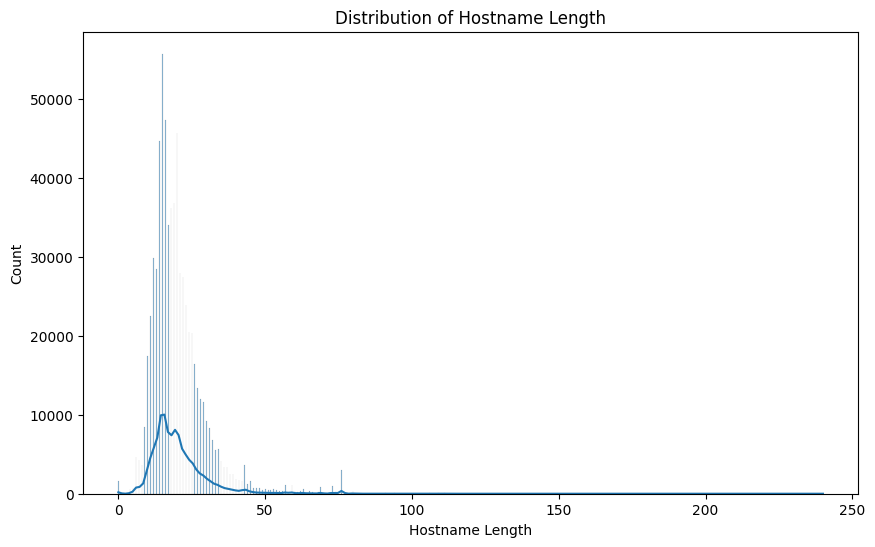

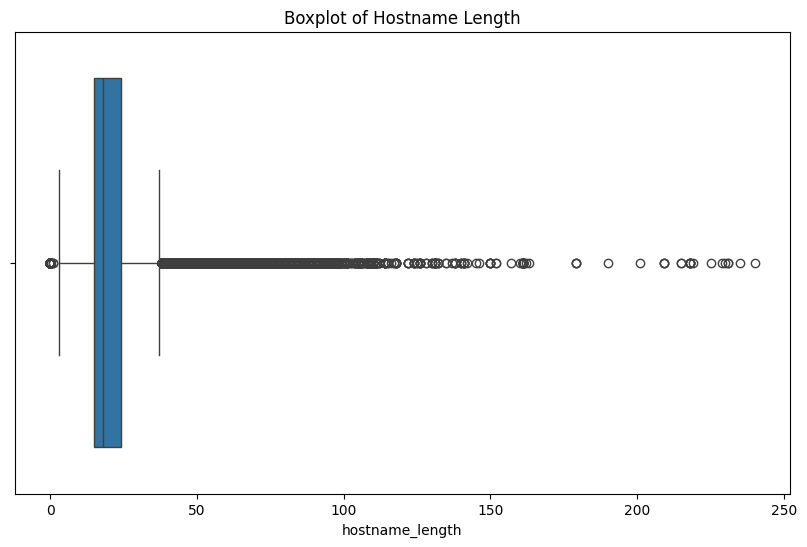

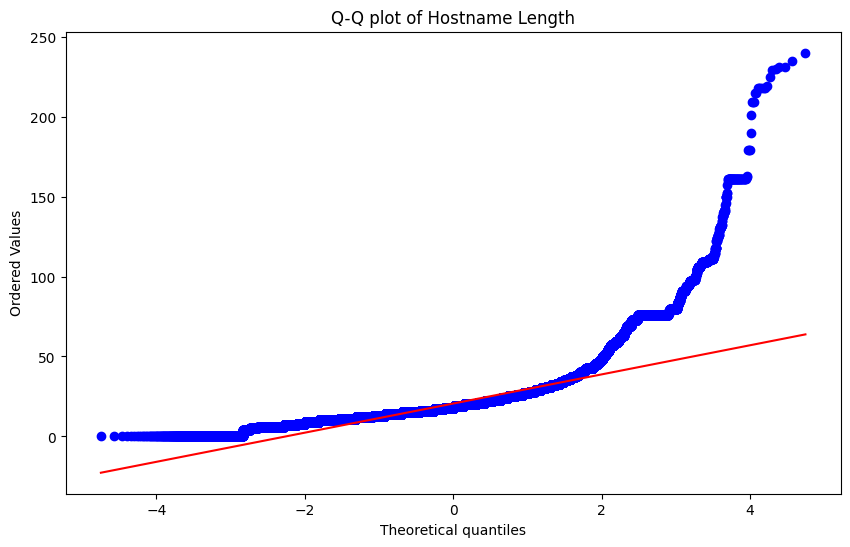


Descriptive Statistics:
count    678047.000000
mean         20.544262
std          10.311868
min           0.000000
25%          15.000000
50%          18.000000
75%          24.000000
max         240.000000
Name: hostname_length, dtype: float64

Skewness: 2.9795846395557075
Kurtosis: 18.402317226992494

Normality test p-value: 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hostname_length', kde=True)
plt.title('Distribution of Hostname Length')
plt.xlabel('Hostname Length')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['hostname_length'])
plt.title('Boxplot of Hostname Length')
plt.show()

import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(df['hostname_length'], dist="norm", plot=plt)
plt.title("Q-Q plot of Hostname Length")
plt.show()

print("\nDescriptive Statistics:")
print(df['hostname_length'].describe())

print("\nSkewness:", df['hostname_length'].skew())
print("Kurtosis:", df['hostname_length'].kurtosis())

_, p_value = stats.normaltest(df['hostname_length'])
print("\nNormality test p-value:", p_value)

In [ ]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))
df

,url,type,class_url,url_length,hostname_length,count-www
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1
...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0


In [ ]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [ ]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1,1,1,2,0,1,1,1,0,1,0
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0,1,1,2,0,0,0,0,0,1,0
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1,1,1,2,0,0,2,0,0,2,0
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1,1,1,3,0,0,0,0,0,3,0
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1,1,1,2,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1,1,1,3,0,0,0,0,0,3,0
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1,1,1,3,0,0,1,0,0,5,0
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0,0,1,2,0,0,0,0,0,3,0
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0,0,1,15,0,2,1,6,0,3,0


In [ ]:
import re

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian,short_url
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1,1,1,2,0,1,1,1,0,1,0,0
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0,1,1,2,0,0,0,0,0,1,0,0
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1,1,1,2,0,0,2,0,0,2,0,1
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1,1,1,3,0,0,0,0,0,3,0,1
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1,1,1,2,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1,1,1,3,0,0,0,0,0,3,0,0
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1,1,1,3,0,0,1,0,0,5,0,0
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0,0,1,2,0,0,0,0,0,3,0,1
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0,0,1,15,0,2,1,6,0,3,0,0


In [ ]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
from tld import get_tld

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))


#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1,1,1,2,0,1,1,1,0,1,0,0,5,com,3
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0,1,1,2,0,0,0,0,0,1,0,0,0,dev,3
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1,1,1,2,0,0,2,0,0,2,0,1,8,com,3
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1,1,1,3,0,0,0,0,0,3,0,1,7,com,3
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1,1,1,2,0,0,1,0,0,1,0,0,14,com,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1,1,1,3,0,0,0,0,0,3,0,0,8,gov,3
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1,1,1,3,0,0,1,0,0,5,0,0,3,com,3
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0,0,1,2,0,0,0,0,0,3,0,1,2,com,3
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0,0,1,15,0,2,1,6,0,3,0,0,11,com,3


In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr|svip|shop|ts09|88|vip|club|',
                      url)
    if match:
        return 1
    else:
        return 0

df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['count-digits']= df['url'].apply(lambda i: digit_count(i))



def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1,1,1,2,0,...,0,1,0,0,5,com,3,1,2,32
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0,1,1,2,0,...,0,1,0,0,0,dev,3,1,1,20
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1,1,1,2,0,...,0,2,0,1,8,com,3,1,6,43
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1,1,1,3,0,...,0,3,0,1,7,com,3,1,7,72
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1,1,1,2,0,...,0,1,0,0,14,com,3,1,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1,1,1,3,0,...,0,3,0,0,8,gov,3,1,7,99
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1,1,1,3,0,...,0,5,0,0,3,com,3,1,6,33
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0,0,1,2,0,...,0,3,0,1,2,com,3,1,0,42
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0,0,1,15,0,...,0,3,0,0,11,com,3,1,89,157


In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    hostname = re.escape(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df


,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1,1,1,2,0,...,1,0,0,5,com,3,1,2,32,1
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0,1,1,2,0,...,1,0,0,0,dev,3,1,1,20,1
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1,1,1,2,0,...,2,0,1,8,com,3,1,6,43,1
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1,1,1,3,0,...,3,0,1,7,com,3,1,7,72,1
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1,1,1,2,0,...,1,0,0,14,com,3,1,12,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1,1,1,3,0,...,3,0,0,8,gov,3,1,7,99,1
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1,1,1,3,0,...,5,0,0,3,com,3,1,6,33,1
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0,0,1,2,0,...,3,0,1,2,com,3,1,0,42,1
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0,0,1,15,0,...,3,0,0,11,com,3,1,89,157,1


In [ ]:
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1,1,1,2,0,...,0,0,5,com,3,1,2,32,1,0
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0,1,1,2,0,...,0,0,0,dev,3,1,1,20,1,0
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1,1,1,2,0,...,0,1,8,com,3,1,6,43,1,0
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1,1,1,3,0,...,0,1,7,com,3,1,7,72,1,0
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1,1,1,2,0,...,0,0,14,com,3,1,12,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1,1,1,3,0,...,0,0,8,gov,3,1,7,99,1,0
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1,1,1,3,0,...,0,0,3,com,3,1,6,33,1,0
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0,0,1,2,0,...,0,1,2,com,3,1,0,42,1,0
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0,0,1,15,0,...,0,0,11,com,3,1,89,157,1,0


In [ ]:
df['use_of_ip_address'].value_counts()

,count
use_of_ip_address,
0,673947
1,4100


In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
0,https://www.youtube.com/watch?v=6AKW0Q-TVeY,legitimate,0,43,15,1,1,1,2,0,...,0,5,com,3,1,2,32,1,0,1
1,https://hzw6cy.webwave.dev/,phishing,1,27,18,0,1,1,2,0,...,0,0,dev,3,1,1,20,1,0,1
2,https://www.cappex.com/colleges/Woodbury-Unive...,legitimate,0,58,14,1,1,1,2,0,...,1,8,com,3,1,6,43,1,0,1
3,https://www.associatedcontent.com/article/1857...,legitimate,0,92,25,1,1,1,3,0,...,1,7,com,3,1,7,72,1,0,1
4,https://www.mylife.com/c-115210525525,legitimate,0,37,14,1,1,1,2,0,...,0,14,com,3,1,12,18,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,https://www.governor.mo.gov/newsroom/2011/Miss...,legitimate,0,127,19,1,1,1,3,0,...,0,8,gov,3,1,7,99,1,0,1
678043,https://www.ca.linkedin.com/pub/shawn-levy/5/4...,legitimate,0,51,19,1,1,1,3,0,...,0,3,com,3,1,6,33,1,0,1
678044,http://tylerdeveraux.com/BT/BTinter/btconnect....,phishing,1,50,17,0,0,1,2,0,...,1,2,com,3,1,0,42,1,0,1
678045,http://soapcastle.com/212.111.013/cmd-login=60...,phishing,1,295,14,0,0,1,15,0,...,0,11,com,3,1,89,157,1,0,1


In [ ]:
df.isnull().sum()

,0
url,0
type,0
class_url,0
url_length,0
hostname_length,0
count-www,0
count-https,0
count-http,0
count.,0
count%,0


In [ ]:
df.shape

(678047, 26)

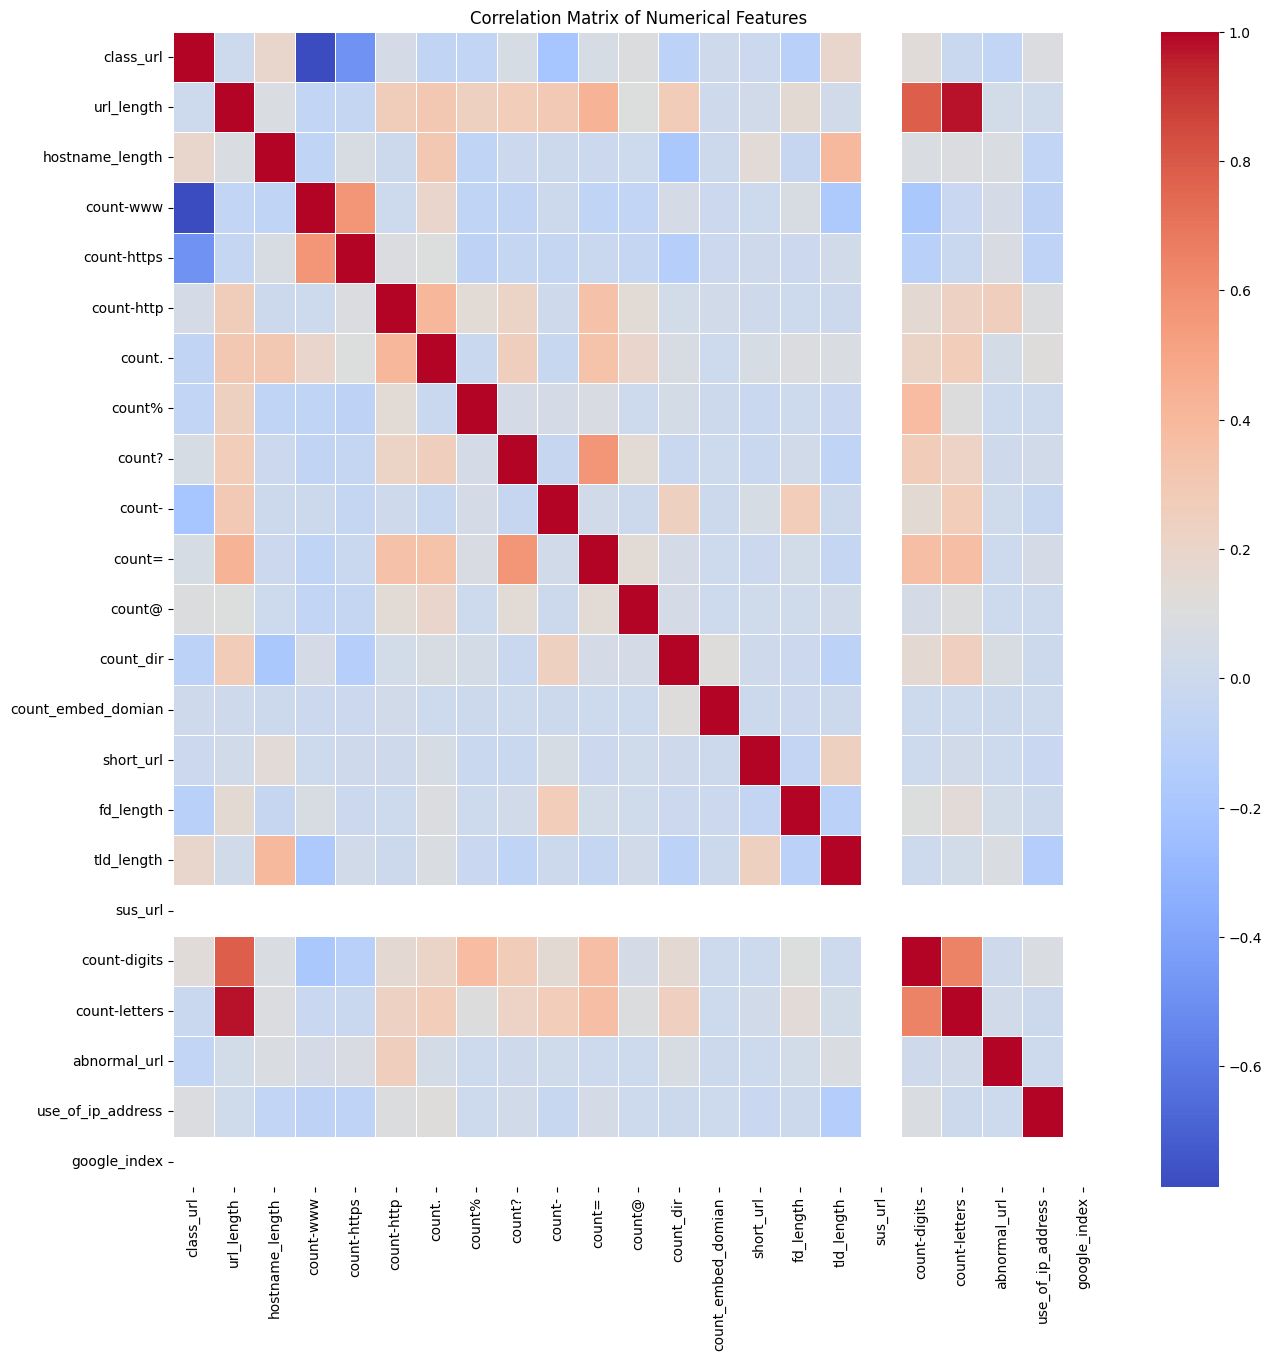

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

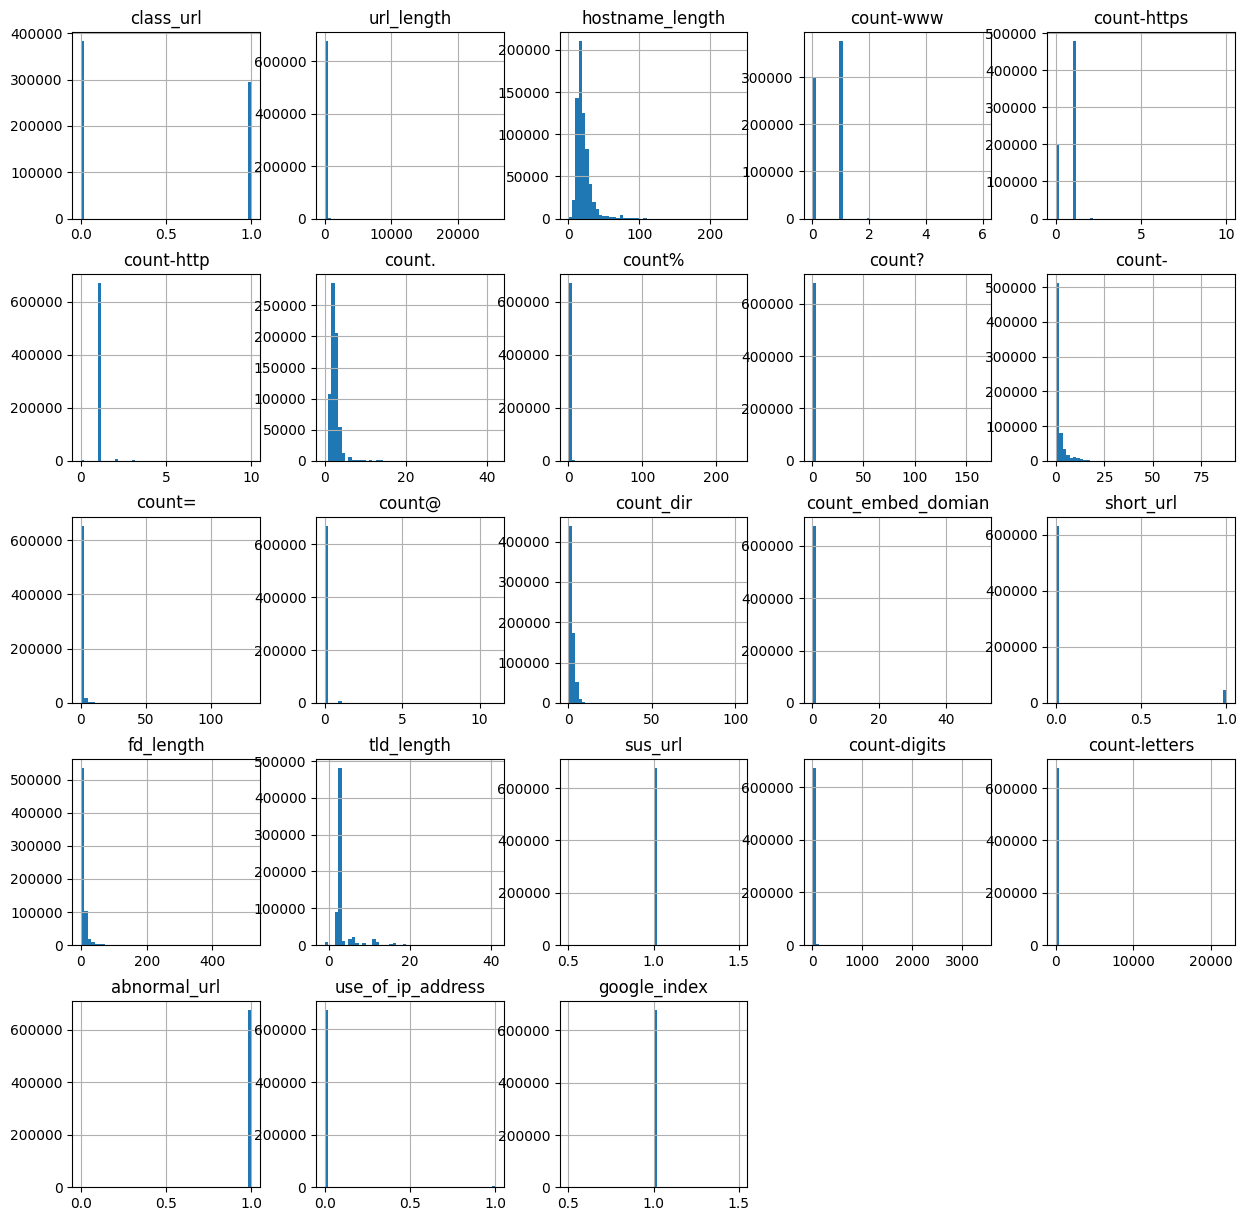

In [ ]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
df.columns

Index(['url', 'type', 'class_url', 'url_length', 'hostname_length',
       'count-www', 'count-https', 'count-http', 'count.', 'count%', 'count?',
       'count-', 'count=', 'count@', 'count_dir', 'count_embed_domian',
       'short_url', 'fd_length', 'tld', 'tld_length', 'sus_url',
       'count-digits', 'count-letters', 'abnormal_url', 'use_of_ip_address',
       'google_index'],
      dtype='object')

In [ ]:
df.to_csv('final_extracted_feature.csv', index=False)

# Phân Tích URL

## Thông tin URL

- **URL**: URL cần phân tích
- **Raw URL**: Được dùng để trích xuất các feature khác
- **Type**: Loại URL
- **Phân loại URL**: (ví dụ: benign/malicious)

## Các Đặc Điểm Của URL

1. **url_length, hostname_length**:
   - Độ dài toàn bộ URL và tên miền.
   - URL độc hại thường có độ dài bất thường.

2. **count-www, count-https, count-http**:
   - Đếm số lần xuất hiện của `www`, `https`, `http`.
   - Nhiều lần xuất hiện có thể là dấu hiệu đáng ngờ.

3. **count., count%, count-, count=, count@**:
   - Đếm các ký tự đặc biệt.
   - URL độc hại thường lạm dụng các ký tự này.

4. **fd_length**:
   - Độ dài của thư mục đầu tiên trong path.
   - Ví dụ: Trong `example.com/first_dir/next`, đo độ dài của `first_dir`.

5. **tld, tld_length**:
   - Top Level Domain và độ dài của nó.
   - Một số TLD thường được dùng trong URL độc hại.

6. **count_dir**:
   - Số lượng thư mục trong path.
   - URL độc có thể có cấu trúc thư mục phức tạp, ví dụ: `/dir1/dir2/dir3/file.php`.

7. **count_embed_domain**:
   - Số lượng tên miền nhúng.
   - Đếm số subdomain hoặc tên miền trong URL, ví dụ: `sub1.sub2.example.com`.

8. **domain**:
   - Tên miền chính.
   - Trích xuất và phân tích tên miền chính để kiểm tra độ tin cậy.

9. **prefix_suffix**:
   - Kiểm tra tiền tố và hậu tố của tên miền.
   - Ví dụ: `login-example.com` có prefix `login-`.

### **Model Training**

In [ ]:
X = df[[
   'use_of_ip_address','abnormal_url', 'google_index', 'count-www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
           'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters'
]]

y = df['class_url']

In [ ]:
X

,use_of_ip_address,abnormal_url,google_index,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,1,1,1,0,1,0,0,1,1,...,1,1,1,43,15,1,5,3,2,32
1,0,1,1,0,0,1,0,0,1,1,...,0,0,0,27,18,1,0,3,1,20
2,0,1,1,1,0,2,0,1,1,1,...,0,2,0,58,14,1,8,3,6,43
3,0,1,1,1,0,3,0,1,1,1,...,0,0,0,92,25,1,7,3,7,72
4,0,1,1,1,0,1,0,0,1,1,...,0,1,0,37,14,1,14,3,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678042,0,1,1,1,0,3,0,0,1,1,...,0,0,0,127,19,1,8,3,7,99
678043,0,1,1,1,0,5,0,0,1,1,...,0,1,0,51,19,1,3,3,6,33
678044,0,1,1,0,0,3,0,1,0,1,...,0,0,0,50,17,1,2,3,0,42
678045,0,1,1,0,0,3,0,0,0,1,...,2,1,6,295,14,1,11,3,89,157


In [ ]:
y

,class_url
0,0
1,1
2,0
3,0
4,0
...,...
678042,0
678043,0
678044,1
678045,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)

In [ ]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (542437, 21)
Y_train Shape : (542437,)
X_test  Shape : (135610, 21)
Y_test  Shape : (135610,)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb

!pip install dask[dataframe]

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
precision=[]
recall=[]
f1=[]
accuracy = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  precision.append(round(a, 3))
  recall.append(round(b, 3))
  f1.append(round(c, 3))
  accuracy.append(round(d, 3))

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
tree.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 3.22 seconds.


In [ ]:
y_pred_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
precision_tree = precision_score(y_test,y_pred_tree)
recall_tree = recall_score(y_test,y_pred_tree)
f1_tree = f1_score(y_test,y_pred_tree)
accuracy_tree = accuracy_score(y_test,y_pred_tree)

#print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(precision_tree))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_tree))
print("Decision Tree: F-Measure on test Data: {:.3f}".format(f1_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(accuracy_tree))

report = classification_report(y_test, y_pred_tree, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

Decision Tree: Precision on test Data: 0.987
Decision Tree: Recall on test Data: 0.940
Decision Tree: F-Measure on test Data: 0.963
Decision Tree: Accuracy on test Data: 0.969

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97     76567
Malicious (1)       0.99      0.94      0.96     59043

     accuracy                           0.97    135610
    macro avg       0.97      0.97      0.97    135610
 weighted avg       0.97      0.97      0.97    135610



In [ ]:
storeResults('Decision Tree', precision_tree,recall_tree,f1_tree,accuracy_tree)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

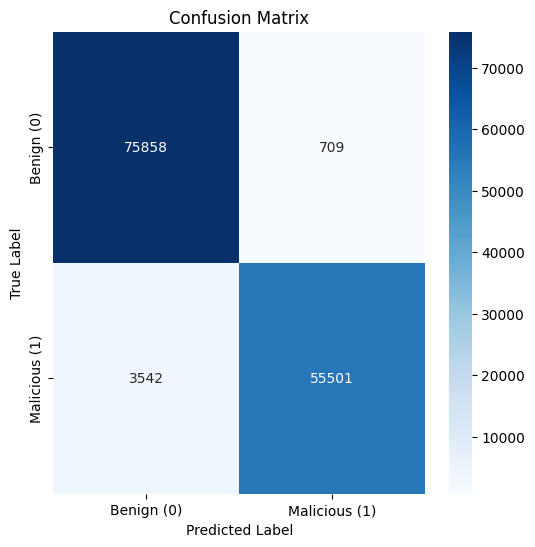

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
forest = RandomForestClassifier(n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42)
forest.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 201.39 seconds.


In [ ]:
y_pred_forest = forest.predict(X_test)
#y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
precision_forest = precision_score(y_test,y_pred_forest)
recall_forest = recall_score(y_test,y_pred_forest)
f1_forest = f1_score(y_test,y_pred_forest)
accuracy_forest = accuracy_score(y_test,y_pred_forest)

print("Random Tree: Precision on test Data: {:.3f}".format(precision_forest))
print("Random forest: Recall on test Data: {:.3f}".format(recall_forest))
print("Random forest: F-Measure on test Data: {:.3f}".format(f1_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(accuracy_forest))

report = classification_report(y_test, y_pred_forest, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

Random Tree: Precision on test Data: 0.993
Random forest: Recall on test Data: 0.981
Random forest: F-Measure on test Data: 0.987
Random forest: Accuracy on test Data: 0.989

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.99      0.99      0.99     76567
Malicious (1)       0.99      0.98      0.99     59043

     accuracy                           0.99    135610
    macro avg       0.99      0.99      0.99    135610
 weighted avg       0.99      0.99      0.99    135610



In [ ]:
storeResults('Random Forest', precision_forest,recall_forest,f1_forest,accuracy_forest)

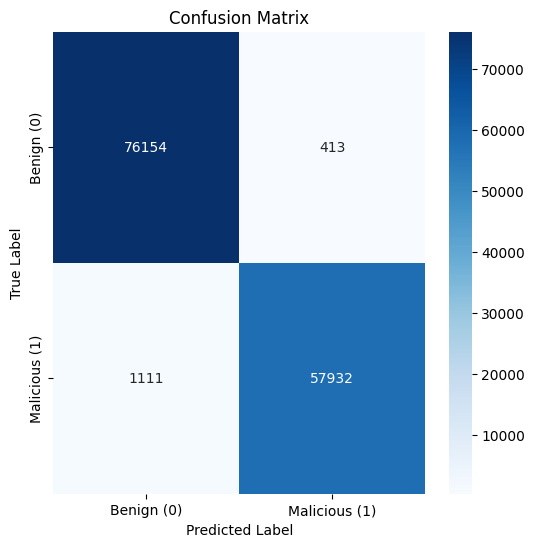

In [ ]:
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

start_time = time.time()
xgb_model = xgb.XGBClassifier(n_estimators= 100)
xgb_model.fit(X_train,y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

y_pred_xgb = xgb_model.predict(X_test)


precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)

print("XGBoost: Precision on test Data: {:.3f}".format(precision_xgb))
print("XGBoost: Recall on test Data: {:.3f}".format(recall_xgb))
print("XGBoost: F-Measure on test Data: {:.3f}".format(f1_xgb))
print("XGBoost: Accuracy on test Data: {:.3f}".format(accuracy_xgb))

report = classification_report(y_test, y_pred_forest, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

Model training completed in 9.16 seconds.
XGBoost: Precision on test Data: 0.992
XGBoost: Recall on test Data: 0.981
XGBoost: F-Measure on test Data: 0.987
XGBoost: Accuracy on test Data: 0.988

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.99      0.99      0.99     76567
Malicious (1)       0.99      0.98      0.99     59043

     accuracy                           0.99    135610
    macro avg       0.99      0.99      0.99    135610
 weighted avg       0.99      0.99      0.99    135610



In [ ]:
storeResults('XGBoost', precision_xgb,recall_xgb,f1_xgb,accuracy_xgb)

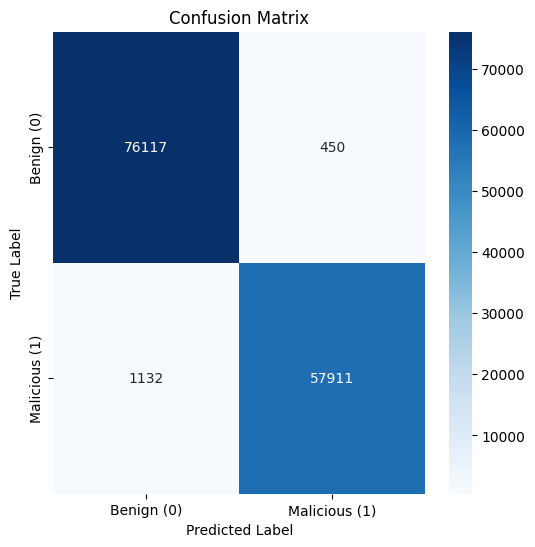

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
start_time = time.time()
lr_regression = LogisticRegression(C=1,max_iter=1000,random_state=0,solver='lbfgs')
lr_regression.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 91.70 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#predicting the target value from the model for the samples
y_pred_lr = lr_regression.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_lr = precision_score(y_test,y_pred_lr)
recall_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)
accuracy_lr = accuracy_score(y_test,y_pred_lr)

print("Logistic Regression: Precision on test Data: {:.3f}".format(precision_lr))
print("Logistic Regression: Recall on test Data: {:.3f}".format(recall_lr))
print("Logistic Regression: F-Measure on test Data: {:.3f}".format(f1_lr))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(accuracy_lr))

Logistic Regression: Precision on test Data: 0.944
Logistic Regression: Recall on test Data: 0.911
Logistic Regression: F-Measure on test Data: 0.927
Logistic Regression: Accuracy on test Data: 0.938


In [ ]:
storeResults('Logistic Regression', precision_lr,recall_lr,f1_lr,accuracy_lr)

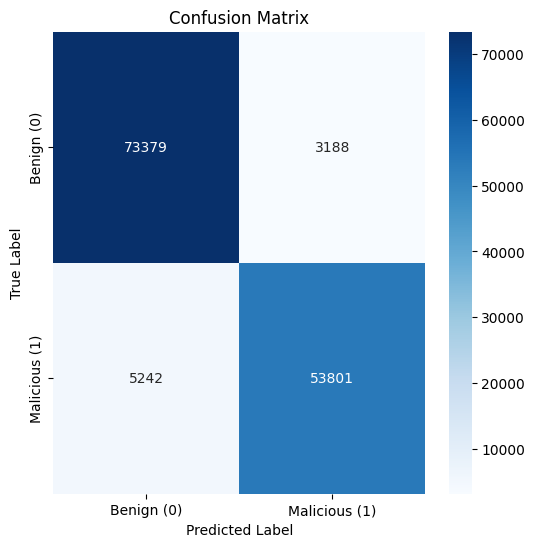

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Linear Discriminant Analysis

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}


grid_search = GridSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


lda_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/d

Model training completed in 45.63 seconds.
Best Parameters: {'shrinkage': None, 'solver': 'lsqr'}
Best Score: 0.9133576806154193


In [ ]:
y_pred_lda = lda_model.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_lda = precision_score(y_test,y_pred_lda)
recall_lda = recall_score(y_test,y_pred_lda)
f1_lda = f1_score(y_test,y_pred_lda)
accuracy_lda = accuracy_score(y_test,y_pred_lda)

print("Logistic Regression: Precision on test Data: {:.3f}".format(precision_lda))
print("Logistic Regression: Recall on test Data: {:.3f}".format(recall_lda))
print("Logistic Regression: F-Measure on test Data: {:.3f}".format(f1_lda))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(accuracy_lda))

Logistic Regression: Precision on test Data: 0.906
Logistic Regression: Recall on test Data: 0.891
Logistic Regression: F-Measure on test Data: 0.899
Logistic Regression: Accuracy on test Data: 0.913


In [ ]:
storeResults('LDA', precision_lda,recall_lda,f1_lda,accuracy_lda)

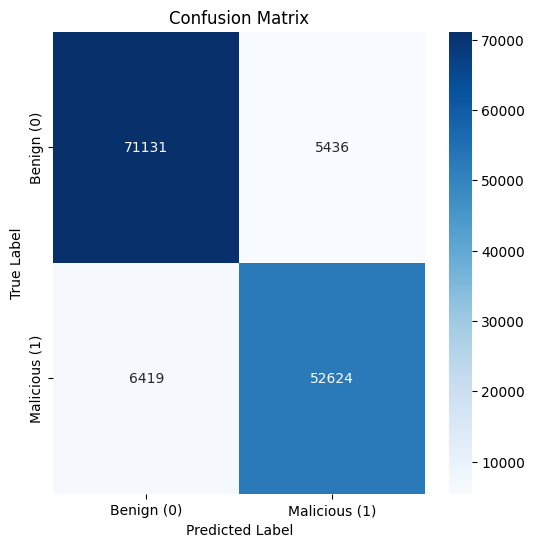

In [ ]:
cm = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## LIGHTGBM

In [ ]:
from lightgbm import LGBMClassifier
start_time = time.time()
lgb = LGBMClassifier(objective='multiclass', num_class=2, boosting_type= 'gbdt', n_jobs = 5,
                     silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

y_pred_lgb = LGB_C.predict(X_test)


precision_lgb = precision_score(y_test,y_pred_lgb)
recall_lgb = recall_score(y_test,y_pred_lgb)
f1_lgb = f1_score(y_test,y_pred_lgb)
accuracy_lgb = accuracy_score(y_test,y_pred_lgb)

print("LightGBM: Precision on test Data: {:.3f}".format(precision_lgb))
print("LightGBM: Recall on test Data: {:.3f}".format(recall_lgb))
print("LightGBM: F-Measure on test Data: {:.3f}".format(f1_lgb))
print("LightGBM: Accuracy on test Data: {:.3f}".format(accuracy_lgb))

report = classification_report(y_test, y_pred_lgb, target_names=['Benign (0)', 'Malicious (1)'])
print("\nClassification Report:\n", report)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 542437, number of used features: 19
[LightGBM] [Info] Start training from score -0.571621
[LightGBM] [Info] Start training from score -0.831512
Model training completed in 16.95 seconds.
[LightGBM] [Warning] Unknown parameter: silent
LightGBM: Precision on test Data: 0.991
LightGBM: Recall on test Data: 0.978
LightGBM: F-Measure on test Data: 0.984
LightGBM: Accuracy on test Data: 0.987

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.98      0.99      0.99     76567
Malicious (1)       0.99      0.98      0.98     59043

     a

In [ ]:
storeResults('LightGBM', precision_lgb,recall_lgb,f1_lgb,accuracy_lgb)

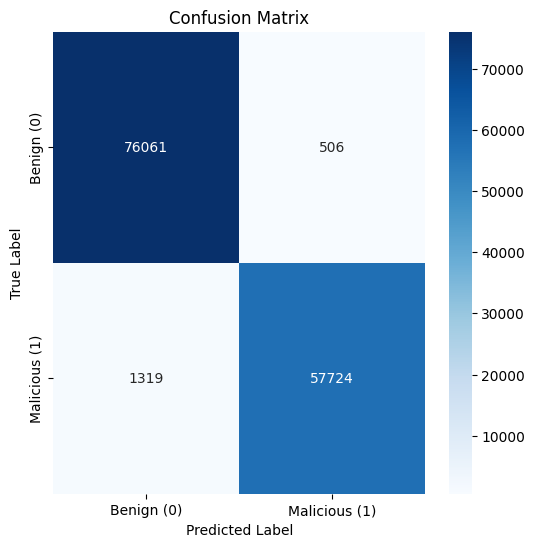

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Ada Boost Classifier

In [ ]:
#ada boost model
from sklearn.ensemble import AdaBoostClassifier
start_time = time.time()
ab_classifier = AdaBoostClassifier(n_estimators=200,
    learning_rate=0.01,
    random_state=0)
ab_classifier.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 103.26 seconds.


In [ ]:
y_pred_ada = ab_classifier.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_ada = precision_score(y_test,y_pred_ada)
recall_ada = recall_score(y_test,y_pred_ada)
f1_ada = f1_score(y_test,y_pred_ada)
accuracy_ada = accuracy_score(y_test,y_pred_ada)

print("Adaptive Boost: Precision on test Data: {:.3f}".format(precision_ada))
print("Adaptive Boost: Recall on test Data: {:.3f}".format(recall_ada))
print("Adaptive Boost: F-Measure on test Data: {:.3f}".format(f1_ada))
print("Adaptive Boost: Accuracy on test Data: {:.3f}".format(accuracy_ada))

Adaptive Boost: Precision on test Data: 0.875
Adaptive Boost: Recall on test Data: 0.890
Adaptive Boost: F-Measure on test Data: 0.882
Adaptive Boost: Accuracy on test Data: 0.897


In [ ]:
storeResults('Ada Boost', precision_ada,recall_ada,f1_ada,accuracy_ada)


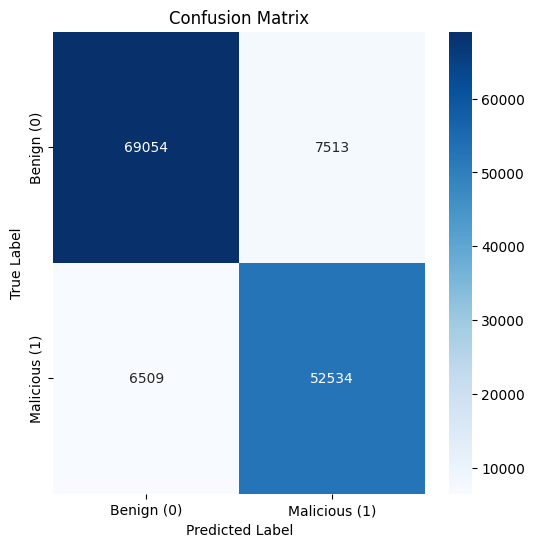

In [ ]:
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
start_time = time.time()
y_pred_knnc = classifier.predict(X_test)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

Model training completed in 1842.30 seconds.


In [ ]:
#computing the accuracy of the model performance
precision_knnc = precision_score(y_test,y_pred_knnc)
recall_knnc = recall_score(y_test,y_pred_knnc)
f1_knnc = f1_score(y_test,y_pred_knnc)
accuracy_knnc = accuracy_score(y_test,y_pred_knnc)

print("K Nearest Neighbours: Precision on test Data: {:.3f}".format(precision_knnc))
print("K Nearest Neighbours: Recall on test Data: {:.3f}".format(recall_knnc))
print("K Nearest Neighbours: F-Measure on test Data: {:.3f}".format(f1_knnc))
print("K Nearest Neighbours: Accuracy on test Data: {:.3f}".format(accuracy_knnc))

K Nearest Neighbours: Precision on test Data: 0.971
K Nearest Neighbours: Recall on test Data: 0.917
K Nearest Neighbours: F-Measure on test Data: 0.943
K Nearest Neighbours: Accuracy on test Data: 0.952


In [ ]:
storeResults('K Nearest Neighbours', precision_knnc,recall_knnc,f1_knnc,accuracy_knnc)

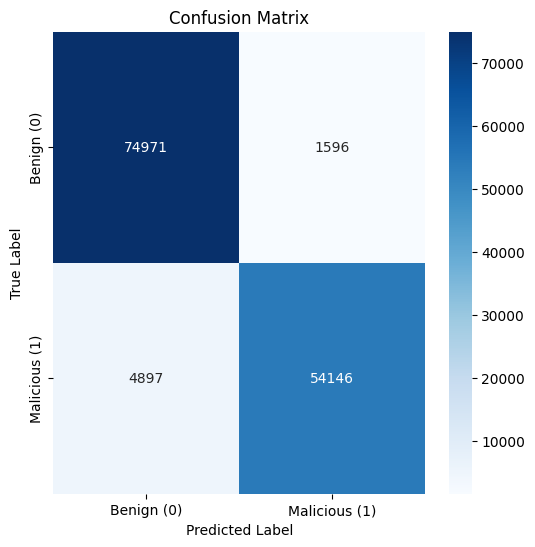

In [ ]:
cm = confusion_matrix(y_test, y_pred_knnc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## GaussianNB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print(f"Model training completed in {end_time - start_time:.2f} seconds.")

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

gn = grid_search.best_estimator_


Model training completed in 15.23 seconds.
Best Parameters: {'var_smoothing': 1e-05}
Best Score: 0.8535922075646232


In [ ]:
y_pred_gn = gn.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
precision_gn = precision_score(y_test,y_pred_gn)
recall_gn = recall_score(y_test,y_pred_gn)
f1_gn = f1_score(y_test,y_pred_gn)
accuracy_gn = accuracy_score(y_test,y_pred_gn)

print("GausianNB: Precision on test Data: {:.3f}".format(precision_gn))
print("GausianNB: Recall on test Data: {:.3f}".format(recall_gn))
print("GausianNB: F-Measure on test Data: {:.3f}".format(f1_gn))
print("GausianNB: Accuracy on test Data: {:.3f}".format(accuracy_gn))

GausianNB: Precision on test Data: 0.905
GausianNB: Recall on test Data: 0.736
GausianNB: F-Measure on test Data: 0.812
GausianNB: Accuracy on test Data: 0.852


In [ ]:
storeResults('GausianNB', precision_gn,recall_gn,f1_gn,accuracy_gn)

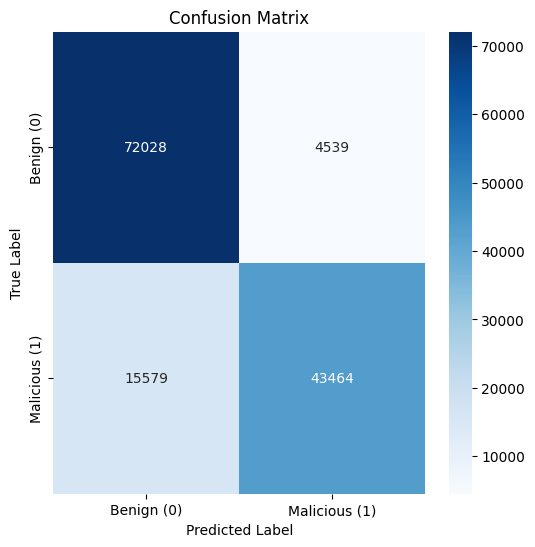

In [ ]:
cm = confusion_matrix(y_test, y_pred_gn)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malicious (1)'], yticklabels=['Benign (0)', 'Malicious (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comparison of Model

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Precision': precision,
    'Recall' : recall,
    'F-Measure':f1,
    'Accuracy': accuracy})

results

,ML Model,Precision,Recall,F-Measure,Accuracy
0,Decision Tree,0.987,0.940,0.963,0.969
1,Random Forest,0.993,0.981,0.987,0.989
2,XGBoost,0.992,0.981,0.987,0.988
3,Logistic Regression,0.944,0.911,0.927,0.938
4,LDA,0.906,0.891,0.899,0.913
5,LightGBM,0.991,0.978,0.984,0.987
6,Ada Boost,0.875,0.890,0.882,0.897
7,K Nearest Neighbours,0.971,0.917,0.943,0.952
8,GausianNB,0.905,0.736,0.812,0.852


In [ ]:
results.sort_values(by=['F-Measure', 'Accuracy'], ascending=False)

,ML Model,Precision,Recall,F-Measure,Accuracy
1,Random Forest,0.993,0.981,0.987,0.989
2,XGBoost,0.992,0.981,0.987,0.988
5,LightGBM,0.991,0.978,0.984,0.987
0,Decision Tree,0.987,0.940,0.963,0.969
7,K Nearest Neighbours,0.971,0.917,0.943,0.952
3,Logistic Regression,0.944,0.911,0.927,0.938
4,LDA,0.906,0.891,0.899,0.913
6,Ada Boost,0.875,0.890,0.882,0.897
8,GausianNB,0.905,0.736,0.812,0.852


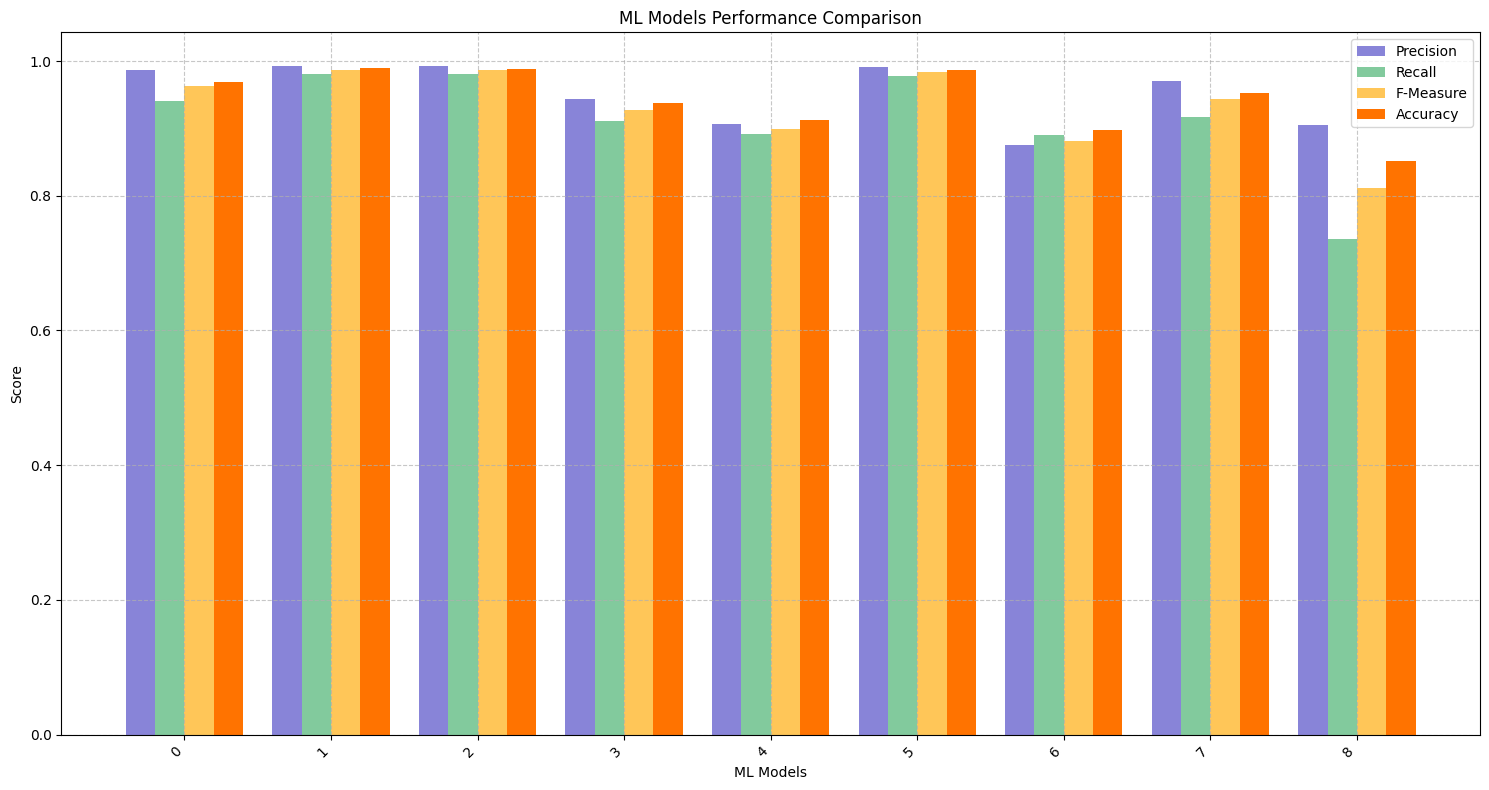

In [ ]:
plt.figure(figsize=(15, 8))


x = range(len(results))
width = 0.2

plt.bar(x, results['Precision'], width, label='Precision', color='#8884d8')
plt.bar([i + width for i in x], results['Recall'], width, label='Recall', color='#82ca9d')
plt.bar([i + width * 2 for i in x], results['F-Measure'], width, label='F-Measure', color='#ffc658')
plt.bar([i + width * 3 for i in x], results['Accuracy'], width, label='Accuracy', color='#ff7300')


plt.xlabel('ML Models')
plt.ylabel('Score')
plt.title('ML Models Performance Comparison')
plt.xticks([i + width*1.5 for i in x], results.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

<ipython-input-161-2b5d9769406b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results.index, rotation=45, ha='right')


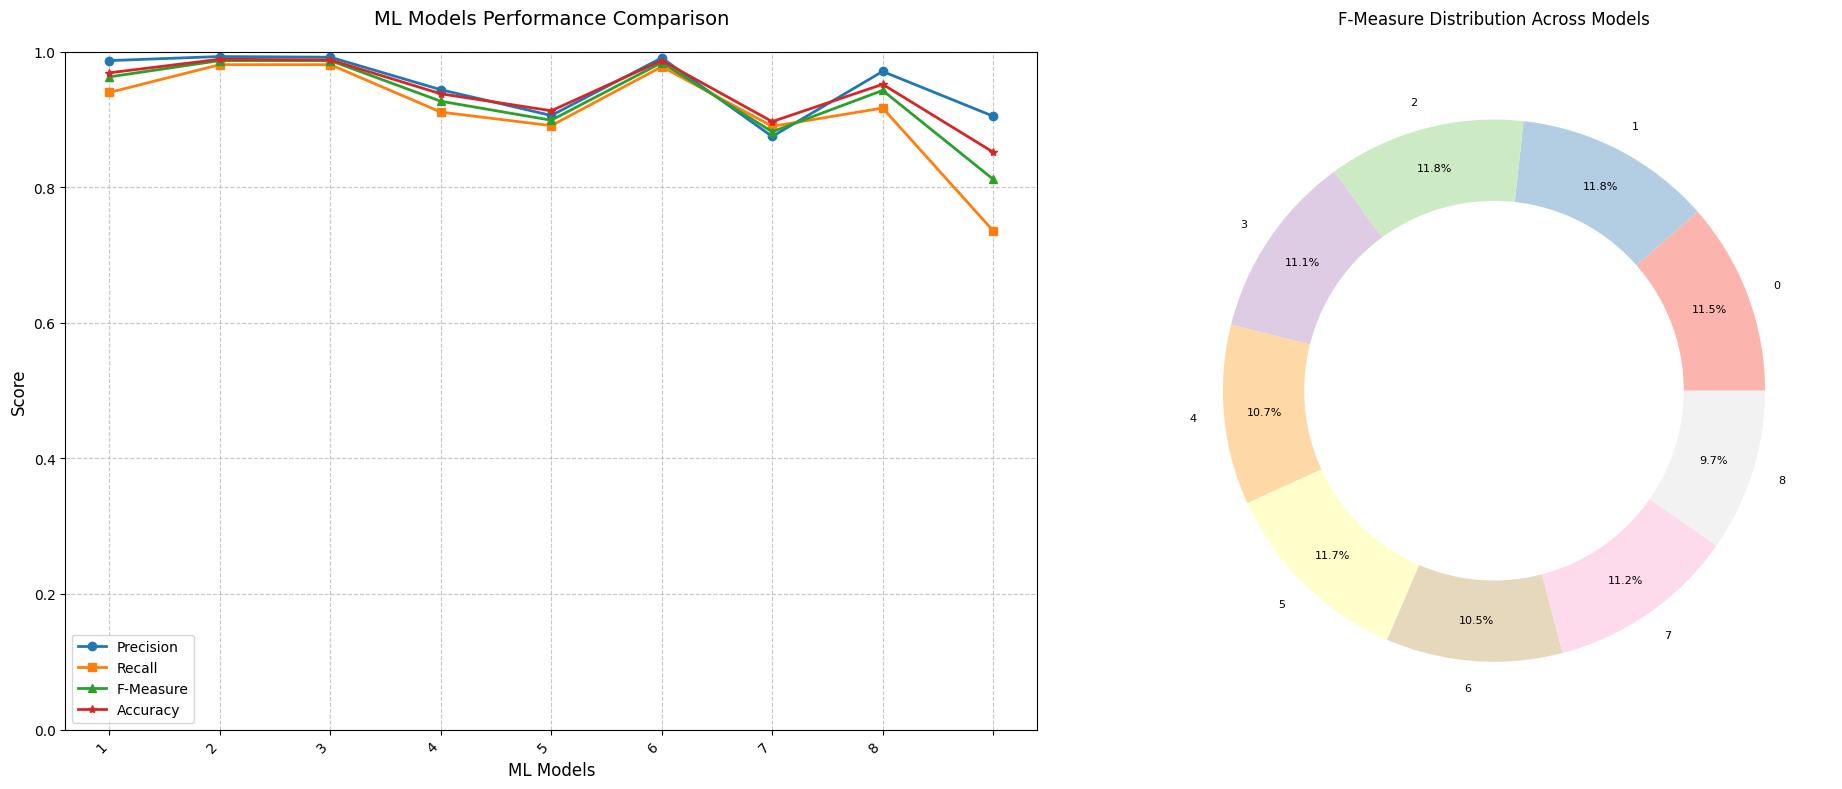

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(results.index, results['Precision'], marker='o', linewidth=2, label='Precision')
ax1.plot(results.index, results['Recall'], marker='s', linewidth=2, label='Recall')
ax1.plot(results.index, results['F-Measure'], marker='^', linewidth=2, label='F-Measure')
ax1.plot(results.index, results['Accuracy'], marker='*', linewidth=2, label='Accuracy')

ax1.set_title('ML Models Performance Comparison', fontsize=14, pad=20)
ax1.set_xlabel('ML Models', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_xticklabels(results.index, rotation=45, ha='right')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()
ax1.set_ylim(0, 1)

colors = plt.cm.Pastel1(np.linspace(0, 1, len(results)))
wedges, texts, autotexts = ax2.pie(results['F-Measure'],
                                  labels=results.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  pctdistance=0.85)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax2.add_artist(centre_circle)


ax2.set_title('F-Measure Distribution Across Models', pad=20)

plt.setp(autotexts, size=8)
plt.setp(texts, size=8)

plt.tight_layout()
plt.show()

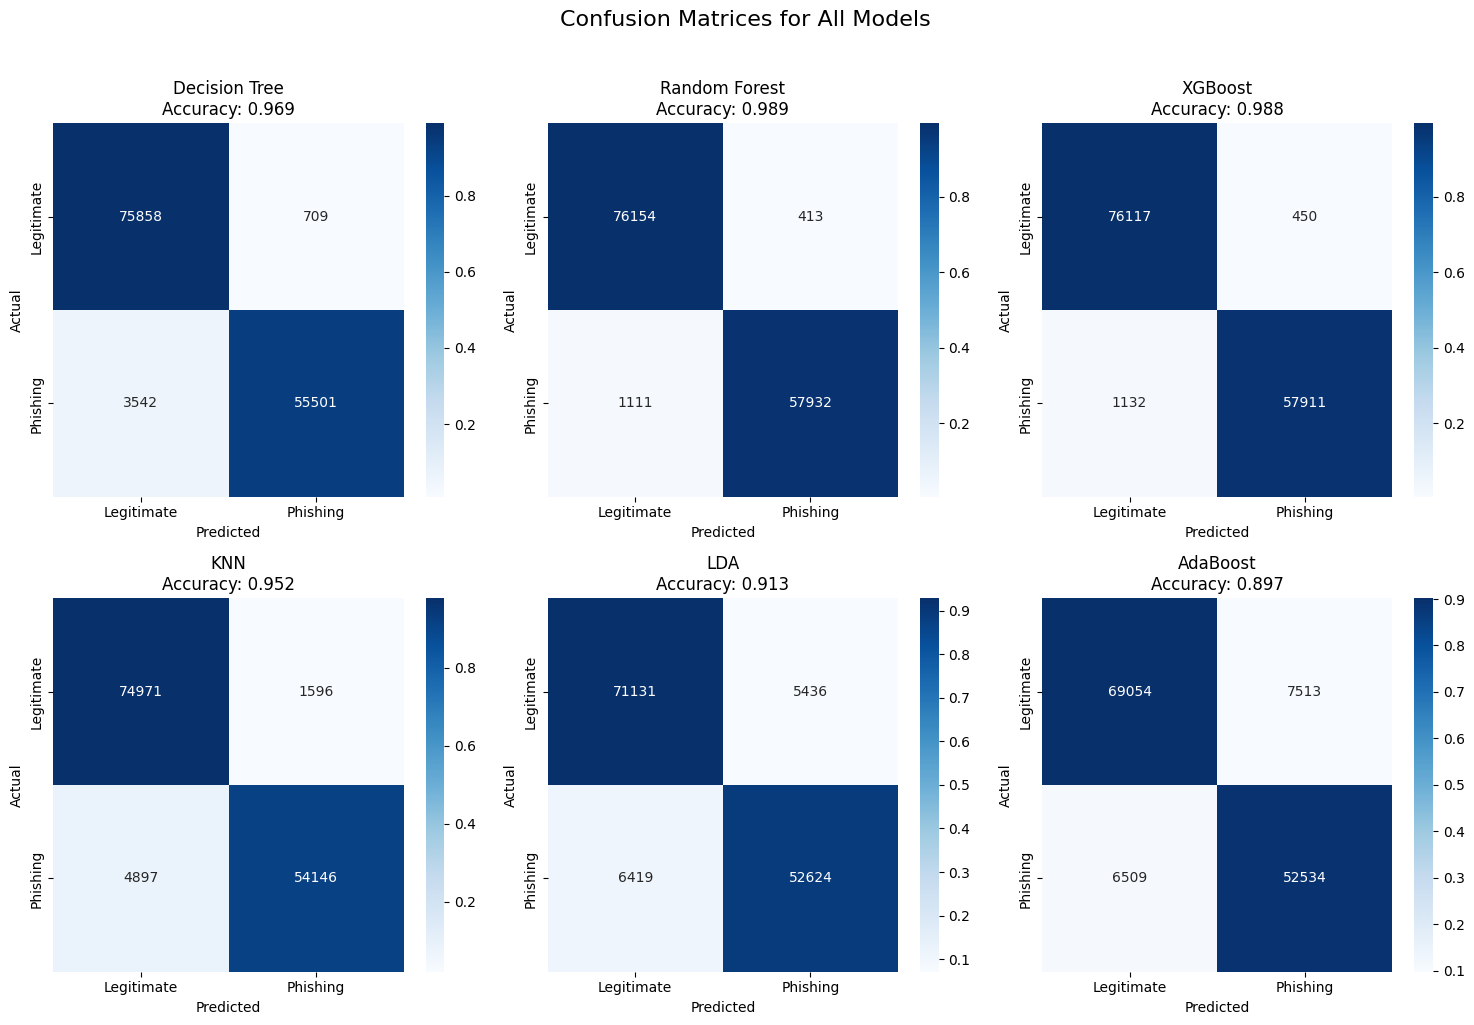

In [ ]:
def plot_combined_confusion_matrices(models, X_test, y_test):
    n_models = len(models)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Confusion Matrices for All Models', fontsize=16, y=1.02)


    if n_rows > 1:
        axes = axes.flatten()


    cmap = plt.cm.Blues

    for idx, (name, model) in enumerate(models.items()):

        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)


        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        sns.heatmap(cm_norm, annot=cm, fmt='d', cmap=cmap,
                    xticklabels=['Legitimate', 'Phishing'],
                    yticklabels=['Legitimate', 'Phishing'],
                    ax=axes[idx])

        axes[idx].set_title(f'{name}\nAccuracy: {model.score(X_test, y_test):.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    for idx in range(len(models), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


models = {
    'Decision Tree': tree,
    'Random Forest': forest,
    'XGBoost': xgb_model,
    'KNN': classifier,
    'LDA': lda_model,
    'AdaBoost': ab_classifier,
}


plot_combined_confusion_matrices(models, X_test, y_test)

# Feature importance

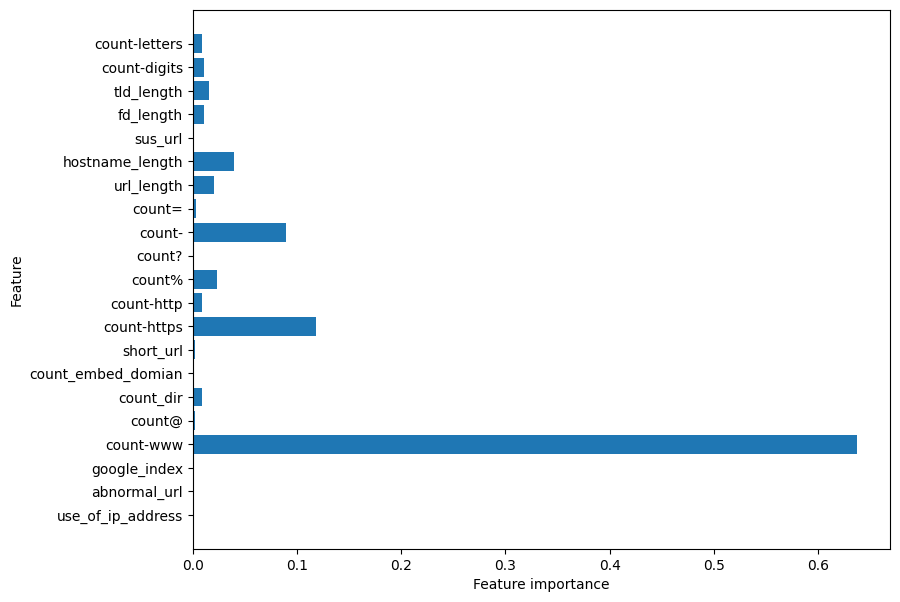

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Fit the DecisionTreeClassifier to your training data
tree.fit(X_train, y_train)  # This line is crucial

# Assign the trained model to classifier (optional, as tree is already trained)
classifier = tree

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), classifier.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Features Append

In [ ]:
def get_url(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))

    return status

# Predict

In [ ]:
def model_predict1(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = tree.predict(features_test)
    if int(pred[0]) == 0:
        res="legimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict2(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = forest.predict(features_test)
    if int(pred[0]) == 0:
      res="legimate"
      return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict3(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = xgb_model.predict(features_test)
    if int(pred[0]) == 0:
      res="legimate"
      return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res



def model_predict4(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res


def model_predict5(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = lr_regression.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict6(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = lda_model.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict7(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = LGB_C.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res


def model_predict8(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = ab_classifier.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

def model_predict9(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = gn.predict(features_test)
    if int(pred[0]) == 0:
        res="legitimate"
        return res

    elif int(pred[0]) == 1:
        res="phishing"
        return res

In [ ]:
urls = ['https://www.youtube.com/',
        'https://www.oxfordlearnersdictionaries.com/',
        'https://vneid.gov.vn/',
        'https://truongcuabeyeu.weebly.com/',
        'https://www.facebook.com/',
        'https://mfacebook-com.vn/',
        'https://yxvyuspkqngxkz.top/',
        'https://www.amazon.com/',
        'https://www.nike.com/',
        'https://www.instagram.com/',
        'https://vincomplaza.ts09.shop/',
        'https://dichvucong.gov.vn/',
        'https://www.wikipedia.org/']

print("DecisionTreeClassifier")
for url in urls:
     print(model_predict1(url))

print("----------------------------------------------")
print("RandomForest")
for url in urls:
     print(model_predict2(url))

print("----------------------------------------------")
print("XGB")
for url in urls:
     print(model_predict3(url))

print("----------------------------------------------")
print("K-nearest")
for url in urls:
     print(model_predict4(url))

print("----------------------------------------------")
print("Logistic Regresion")
for url in urls:
     print(model_predict5(url))

print("----------------------------------------------")
print("Linear Discriminant Analysis ")
for url in urls:
     print(model_predict6(url))

print("----------------------------------------------")
print("LightGBM")
for url in urls:
     print(model_predict7(url))

print("----------------------------------------------")
print("Ada Boost Classifier")
for url in urls:
     print(model_predict8(url))

print("----------------------------------------------")
print("GaussianNB")
for url in urls:
     print(model_predict9(url))

DecisionTreeClassifier
legimate
phishing
phishing
phishing
legimate
phishing
phishing
legimate
legimate
legimate
phishing
phishing
legimate
----------------------------------------------
RandomForest
legimate
legimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

phishing
phishing
legimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


phishing
phishing
legimate
legimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


legimate
phishing
phishing
legimate
----------------------------------------------
XGB
legimate
legimate
phishing
phishing
legimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


phishing
phishing
legimate
legimate
legimate
phishing
phishing
legimate
----------------------------------------------
K-nearest
legitimate
phishing
phishing
phishing
legitimate
phishing
phishing
legitimate
legitimate
legitimate
phishing
phishing
legitimate
----------------------------------------------
Logistic Regresion
legitimate
legitimate
phishing
phishing
legitimate
legitimate
legitimate
legitimate
legitimate
legitimate
phishing
phishing
legitimate
----------------------------------------------
Linear Discriminant Analysis 
legitimate
legitimate
phishing
phishing
legitimate
phishing
phishing
legitimate
legitimate
legitimate
phishing
phishing
legitimate
----------------------------------------------
LightGBM
[LightGBM] [Warning] Unknown parameter: silent
legitimate
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
phishing
[LightGBM] [Warning] Unknown parameter: silent
legi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

legitimate
phishing
phishing
legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


phishing
phishing
legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


legitimate
legitimate
phishing


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


phishing
legitimate
----------------------------------------------
GaussianNB
phishing
phishing
phishing
phishing
phishing
phishing
phishing
phishing
phishing
phishing
phishing
phishing
phishing


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validati